In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import os
import json
import trackpy as tp
from pprint import pprint
from scipy import signal, ndimage

plt.rcParams['figure.figsize'] = (23, 20)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [2]:
date_folder = '2020-11-18'
# data_folder = os.path.join('D:\\', 'Data', 'Dispertech', date_folder)
# data_folder = os.path.join('/home/aquiles', 'Documents', 'Dispertech', 'Data', date_folder)
data_folder = os.path.join('C:\\', 'Users', 'aquic', 'Data', date_folder)
data_files = os.listdir(data_folder)
for i, data_file in enumerate(data_files):
    print(f'{i}\t{data_file}')

0	movie_2001001_0.h5
1	movie_2001001_1.h5


In [14]:
data_num = 1

In [15]:
output_dir = os.path.join(date_folder, data_files[data_num])
# os.makedirs(output_dir, exist_ok=True)
data = h5py.File(os.path.join(data_folder, data_files[data_num]), 'r')
metadata = json.loads(data['data']['metadata'][()].decode())
timelapse = data['data']['timelapse']
pprint(metadata)
print(timelapse.shape)

{'allocate': 113,
 'end': 1605715403.0898228,
 'fps': 33.244680851063826,
 'frames': 115,
 'start': 1605715395.8422072}
(1920, 1200, 226)


In [16]:
metadata['end']-metadata['start']

7.247615575790405

In [17]:
data = timelapse[..., :metadata['frames']]
# data = timelapse[..., :1200]
# data = timelapse[...]

In [18]:
d = []
blank = np.zeros((data.shape[0], data.shape[1]))
for i in range(data.shape[2]-1):
    if np.all(data[:,:,i+1] == data[:,:,i]):
        print(f'{i} frames out of {data.shape[2]}. Repeated: {len(d)}', end='\r')
#         data[:, :, i+1] = blank
        d.append(i+1)
print(f'\nFound {len(d)} repeated frames')
# data = np.delete(data, d, axis=2)


Found 0 repeated frames


In [19]:
d

[]

In [14]:
frame_no = 950
to_plot = data[..., frame_no]
plt.imshow(to_plot.T)

IndexError: index 950 is out of bounds for axis 2 with size 63

In [10]:
inlet = np.sum(np.sum(data[-10:,:,:], 1), 0)
outlet = np.sum(np.sum(data[:10,:,:], 1), 0)
center = np.sum(np.sum(data[1000:1010], 1), 0)

In [11]:
print(inlet.shape, outlet.shape, center.shape)

(1200,) (1200,) (1200,)


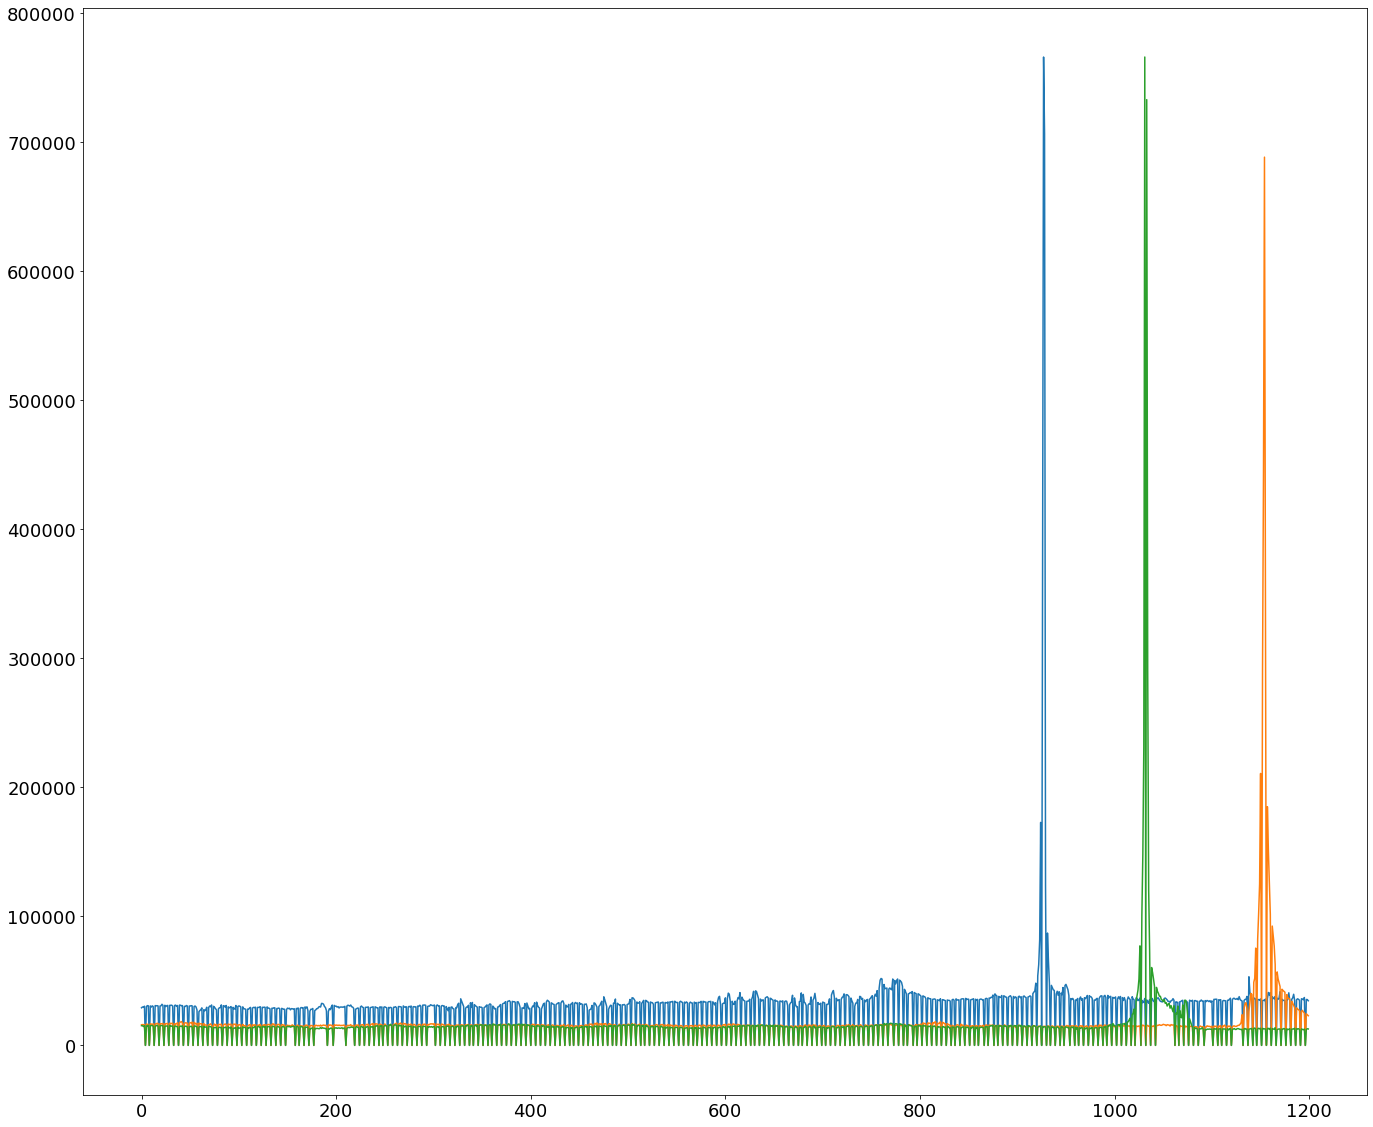

In [12]:
plt.plot(inlet[:1500])
plt.plot(outlet[:1500])
plt.plot(center[:1500])

In [14]:
np.where(inlet>100000)[0][0]

924

In [15]:
np.where(outlet>100000)[0][0]

1148

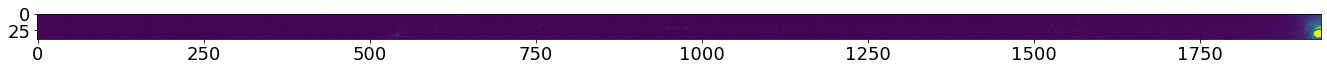

In [16]:
plt.imshow(data[...,927].T)

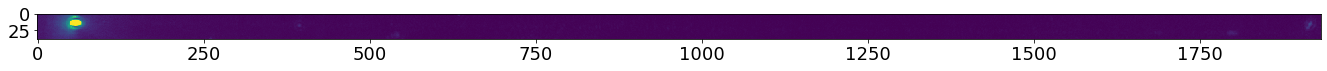

In [17]:
plt.imshow(data[...,1148].T)

In [18]:
f = tp.locate(data[...,1148].T, 11, minmass=10000)

/opt/anaconda3/envs/disper/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/disper/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/disper/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


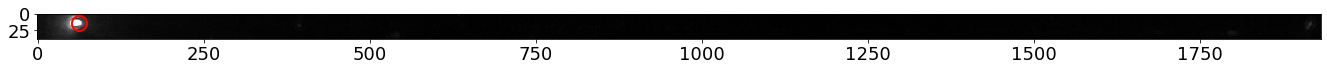

In [19]:
tp.annotate(f, data[..., 1148].T)

In [20]:
f = tp.batch(list(data[...,927:1148].T), 11, minmass=10000)

Frame 220: 1 features


In [57]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,30.472343,1925.109909,44609.953060,3.128983,0.116299,1103.642769,290485.0,0.024889,0
1,30.412050,1916.419054,42731.553053,3.081716,0.117779,1095.830429,282354.0,0.010281,1
2,30.047956,1907.872881,48505.341086,3.082096,0.082643,1302.455988,292221.0,0.020936,2
3,29.789031,1898.864755,48947.929003,3.136353,0.101568,1232.150399,293395.0,0.031183,4
4,29.717171,1889.910671,49484.347212,3.165143,0.104365,1222.080917,295062.0,0.023074,5


In [21]:
f = f[f['raw_mass'] > 200000]

/opt/anaconda3/envs/disper/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/disper/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/disper/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


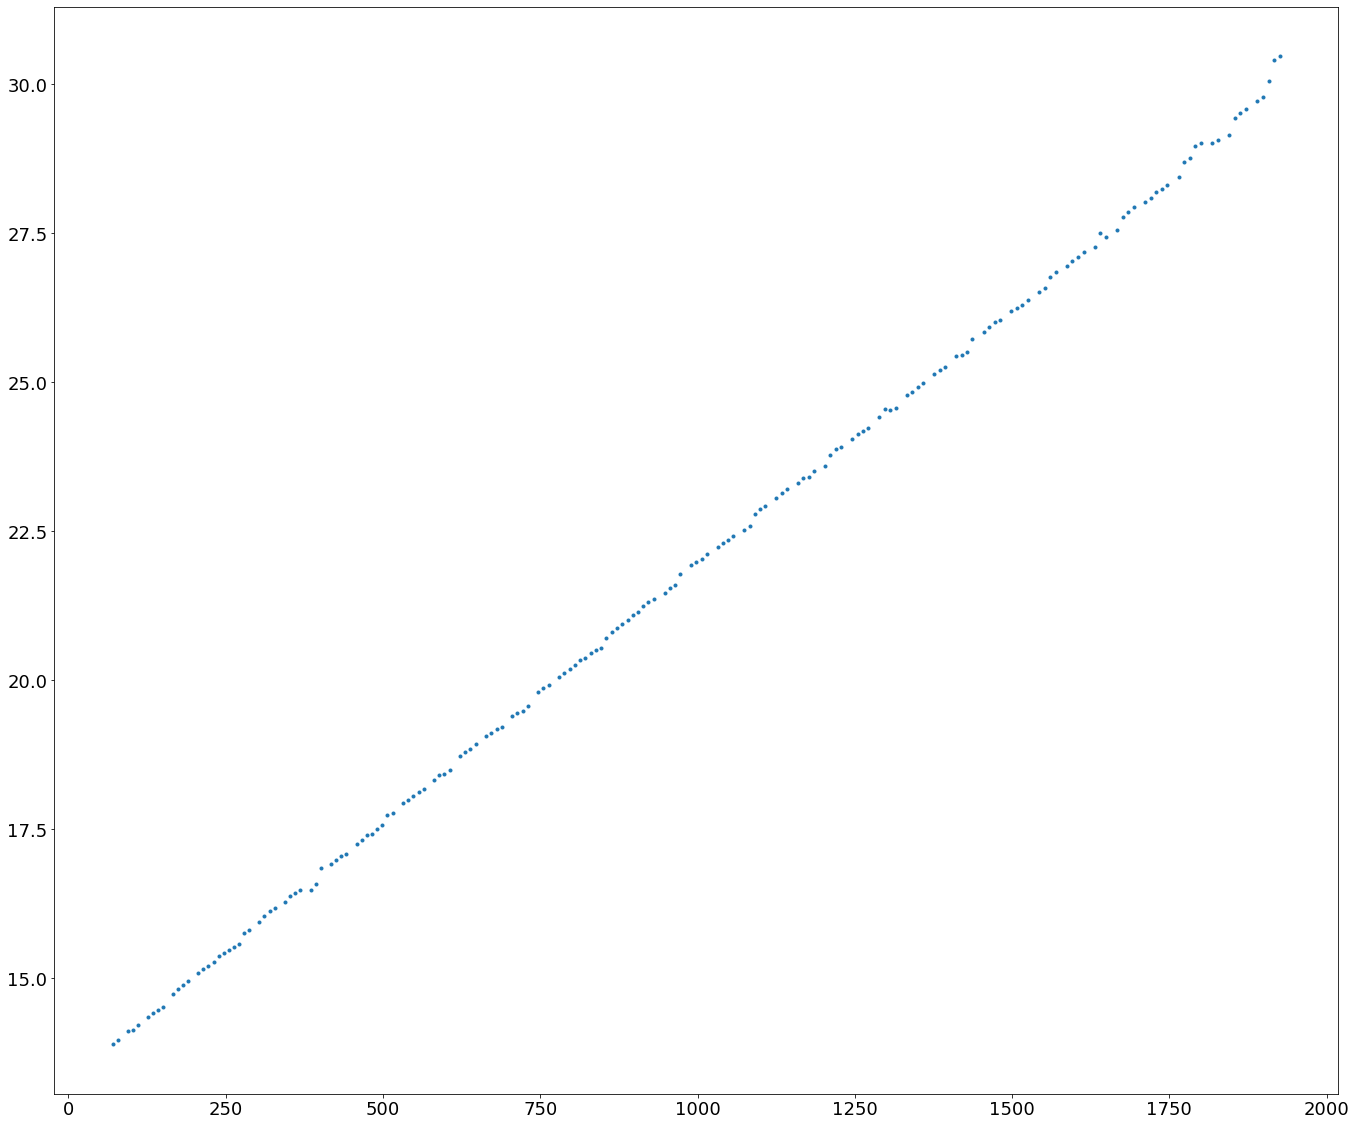

In [22]:
plt.plot(f['x'], f['y'], '.')

In [23]:
fit = np.polyfit(f['x'], f['y'], 1)

/opt/anaconda3/envs/disper/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/anaconda3/envs/disper/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/disper/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


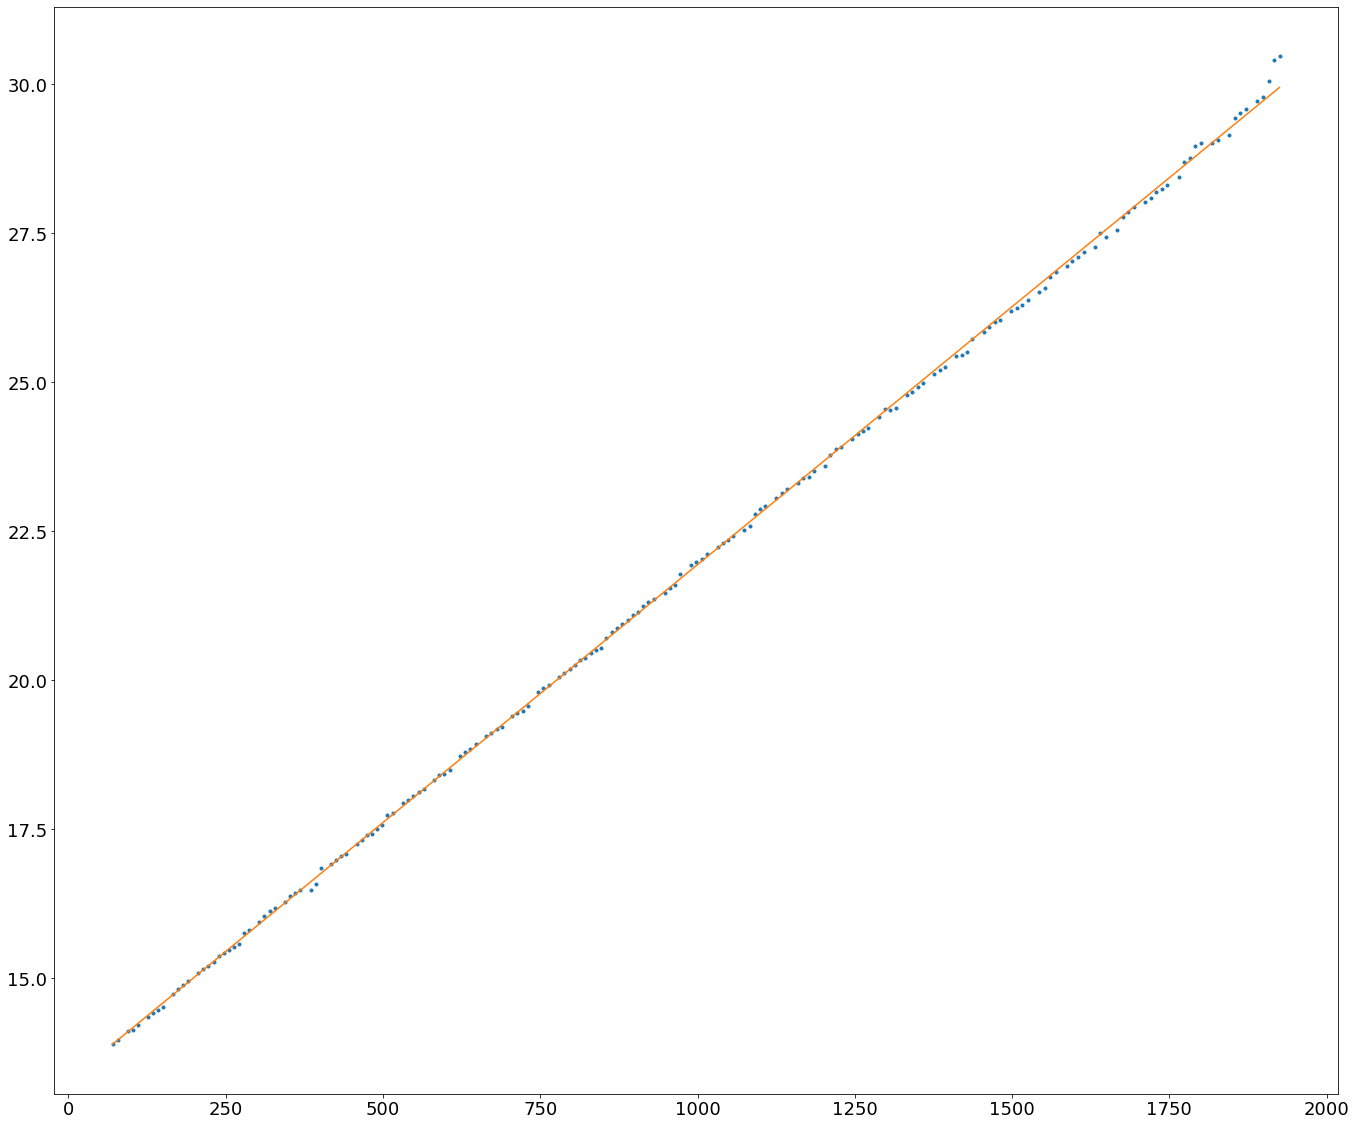

In [24]:
plt.plot(f['x'], f['y'], '.')
plt.plot(f['x'], np.polyval(fit, f['x']), '-')

In [25]:
# data = timelapse[..., :metadata['frames']]
data = timelapse[..., :5000]

In [26]:
d = []
blank = np.zeros((data.shape[0], data.shape[1]))
for i in range(data.shape[2]-1):
    if np.all(data[:,:,i+1] == data[:,:,i]):
        print(f'{i} frames out of {data.shape[2]}. Repeated: {len(d)}', end='\r')
        data[:, :, i+1] = blank
        d.append(i+1)
print(f'\nFound {len(d)} repeated frames')
# data = np.delete(data, d, axis=2)

4997 frames out of 5000. Repeated: 995
Found 996 repeated frames


In [27]:
ddata = np.zeros((data.shape[0], 14, data.shape[2]))
for i in range(data.shape[2]):
    if i in d: continue
    for j in range(data.shape[0]):
        y_min = np.polyval(fit, j).astype(np.int) - 7
        y_max = np.polyval(fit, j).astype(np.int) + 7
        
        ddata[j, :, i] = data[j, y_min:y_max, i]
    if i%100 == 0:
        print(f'Processed {i} frames out of {data.shape[2]}', end='\r')

In [28]:
data = ddata

In [29]:
waterfall = np.sum(data, 1)

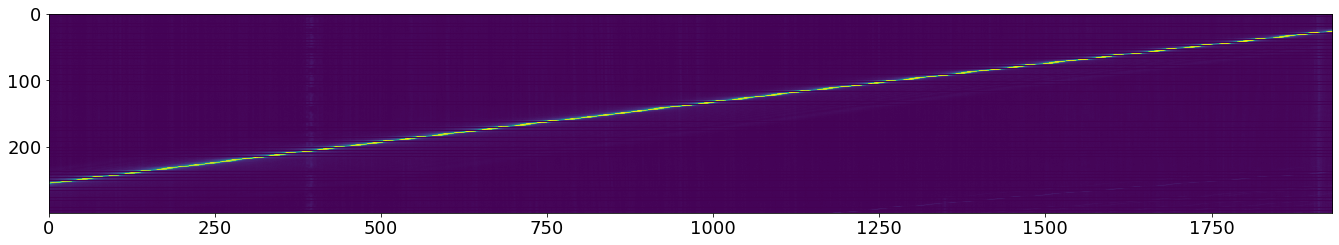

In [35]:
plt.imshow(waterfall[...,900:1200].T)

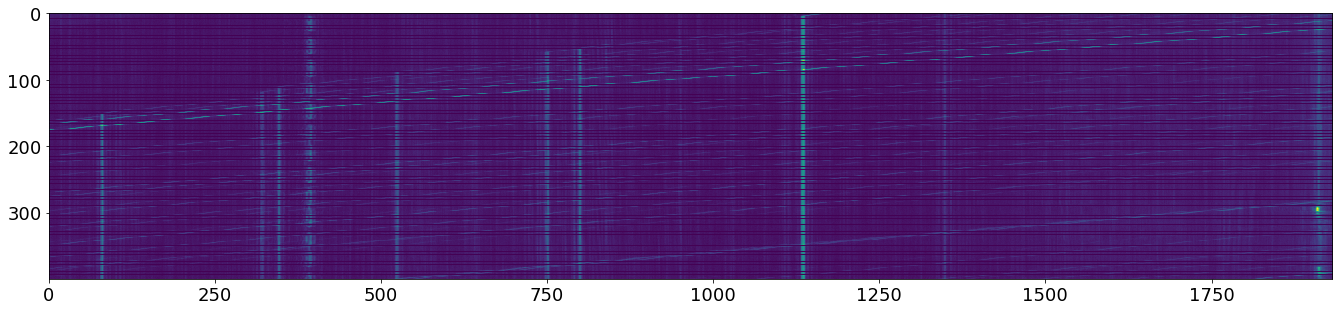

In [36]:
plt.imshow(waterfall[...,1200:1600].T)

In [37]:
def gaussian_kernel(sigma, truncate=4.0):
    "1D discretized gaussian"
    lw = int(truncate * sigma + 0.5)
    x = np.arange(-lw, lw+1)
    result = np.exp(x**2/(-2*sigma**2))
    return result / np.sum(result)

In [52]:
bkg = np.zeros(waterfall.shape)
for i in range(waterfall.shape[0]):
    bkg[i,:] = ndimage.filters.correlate1d(waterfall[i,:], gaussian_kernel(5))
    bkg[i,d] = 0

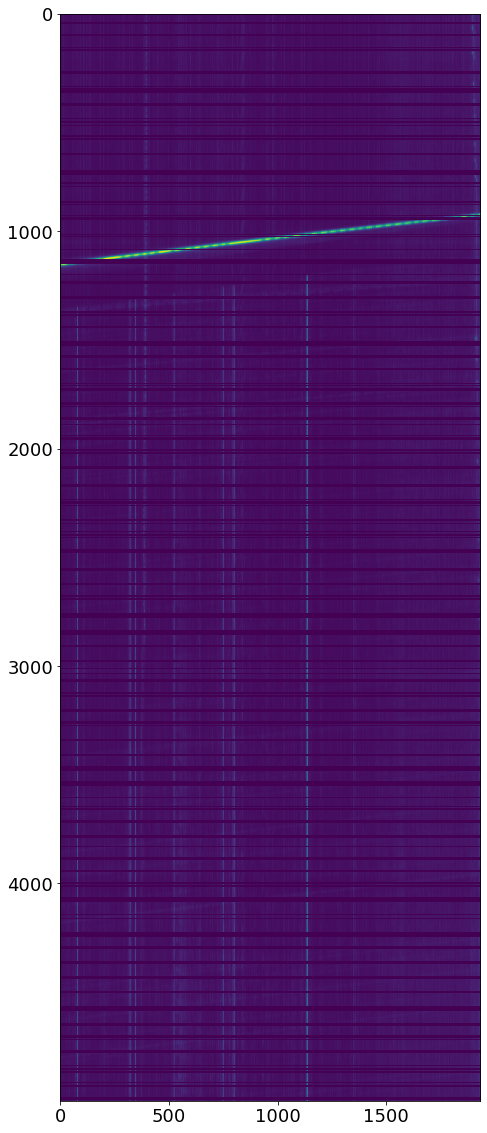

In [53]:
plt.imshow(bkg.T)

In [54]:
corrected_data = waterfall-bkg

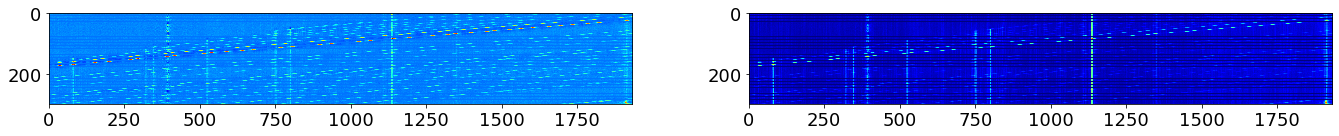

In [55]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(corrected_data[...,1200:1500].T, cmap='jet')
ax[1].imshow(waterfall[...,1200:1500].T, cmap='jet')

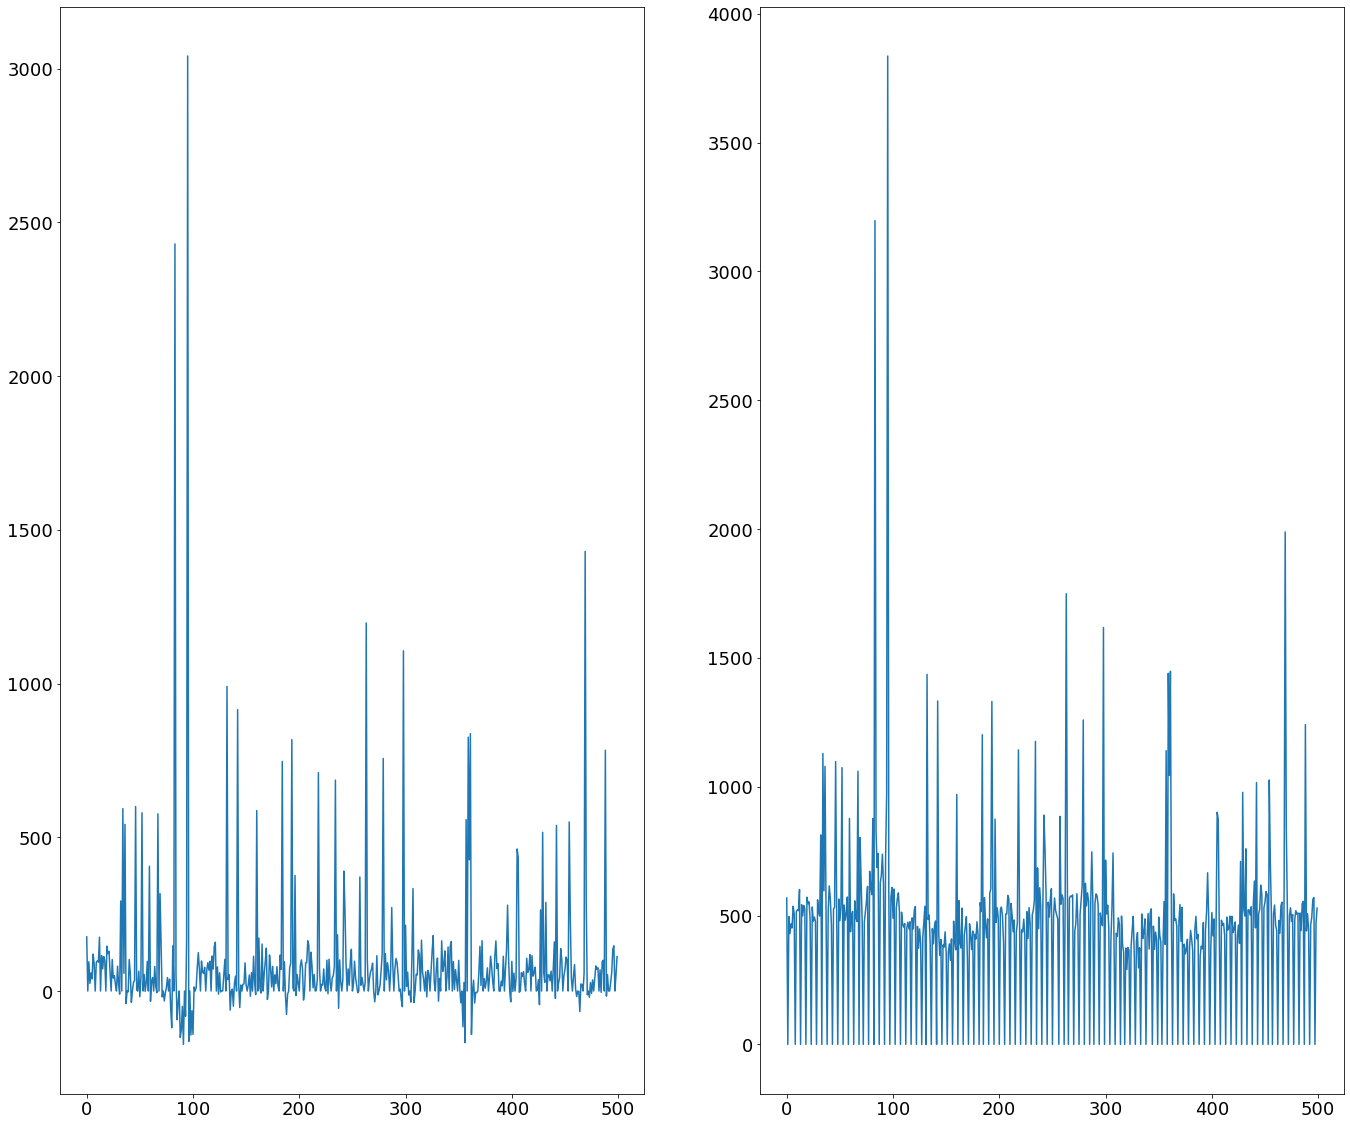

In [56]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(corrected_data[1000,1200:1700])
ax[1].plot(waterfall[1000,1200:1700])

In [57]:
to_analyze = corrected_data[:,1250]

(0, 1900)

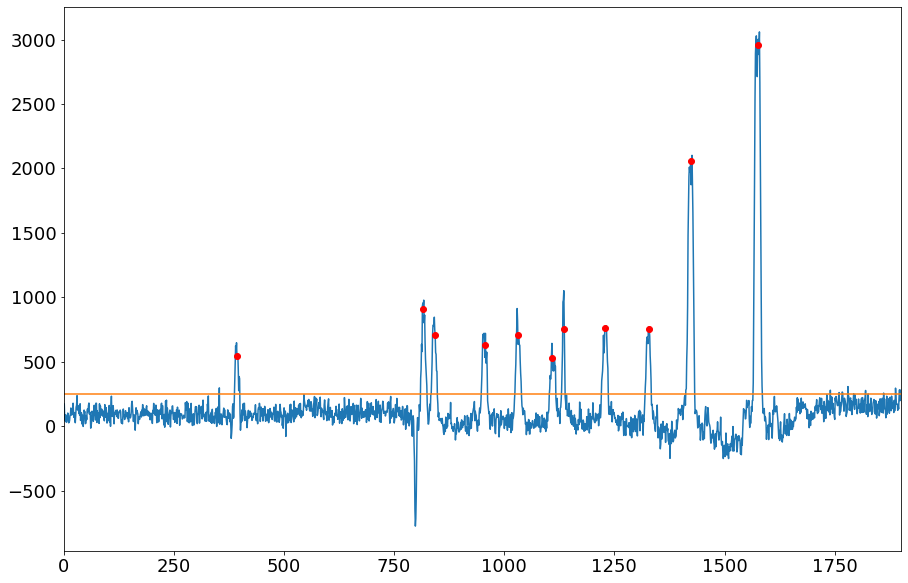

In [69]:
threshold = 250
peaks = signal.find_peaks_cwt(to_analyze, np.linspace(10, 15))
peaks = peaks[to_analyze[peaks]>threshold]
fig = plt.figure(figsize=(15, 10))
plt.plot(to_analyze)
plt.plot(peaks, to_analyze[peaks], 'ro')
plt.plot(plt.xlim(), (threshold, threshold))
plt.xlim(0,1900)

In [59]:
# to_analyze = np.sum(data[...,1250],1)-np.mean(data)
to_analyze = corrected_data[..., 1250]
correlated = ndimage.filters.correlate1d(to_analyze, gaussian_kernel(10))
filtered = ndimage.filters.uniform_filter1d(to_analyze, 50)
dilation = ndimage.grey_dilation(correlated, size=25)

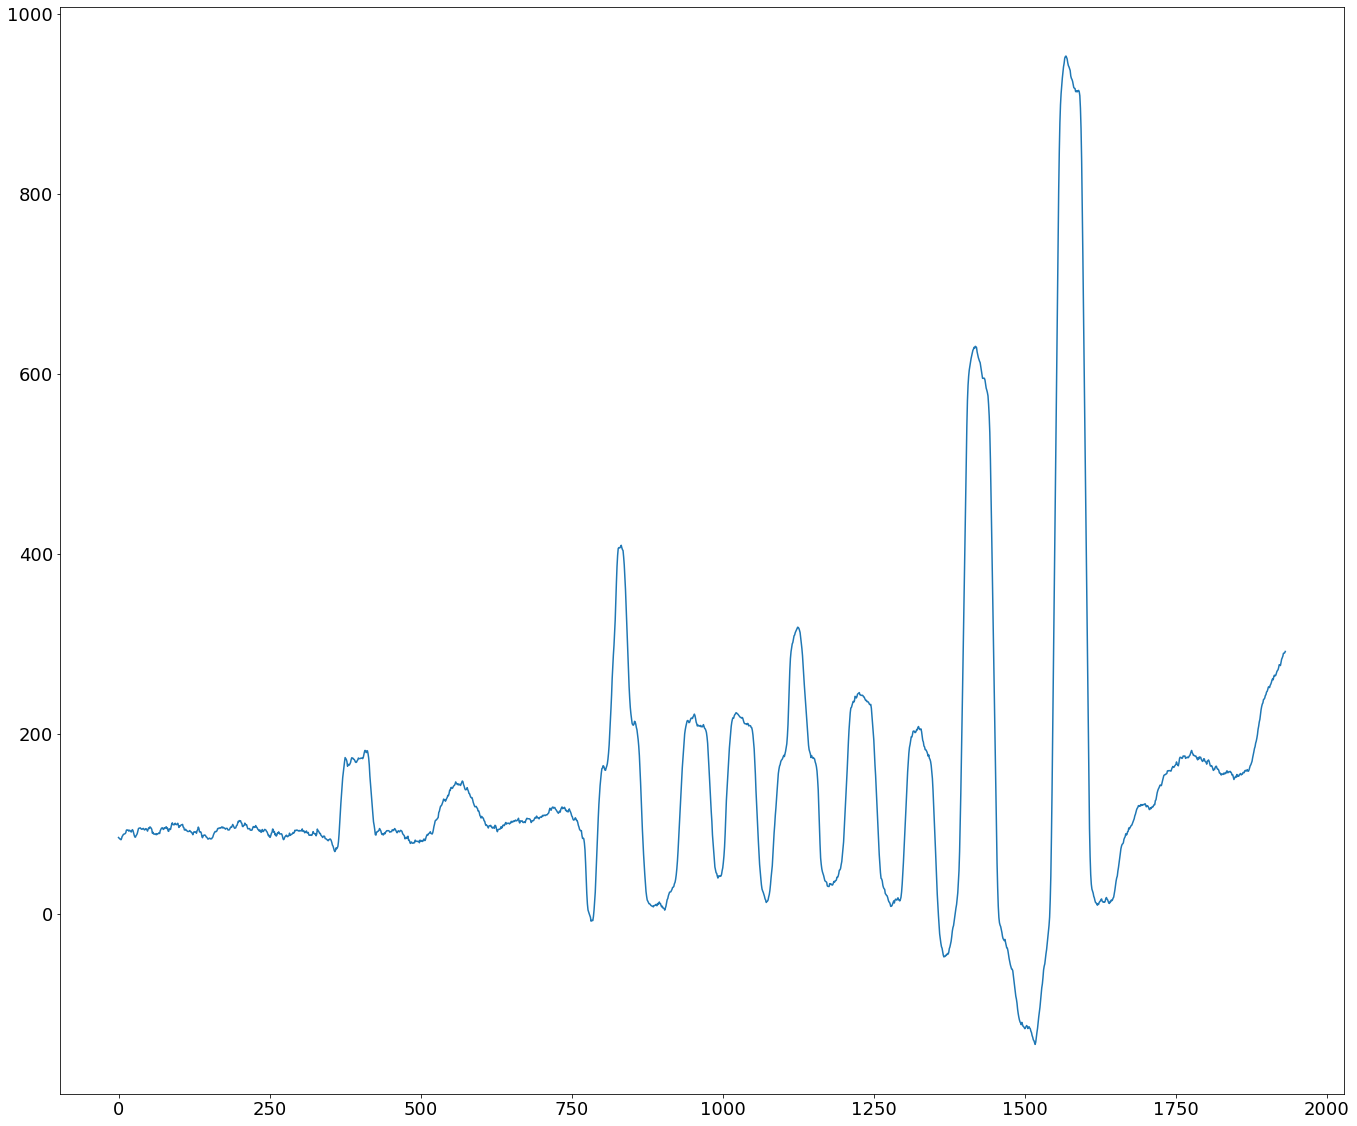

In [60]:
plt.plot(filtered)

In [65]:
threshold = np.percentile(dilation, 64)
maxima = (correlated-filtered == dilation) & (correlated-filtered > threshold)
pos = np.vstack(np.where(maxima)).T
print(f'Found {len(pos)} peaks')

Found 0 peaks


Text(0.5, 1.0, 'Image')

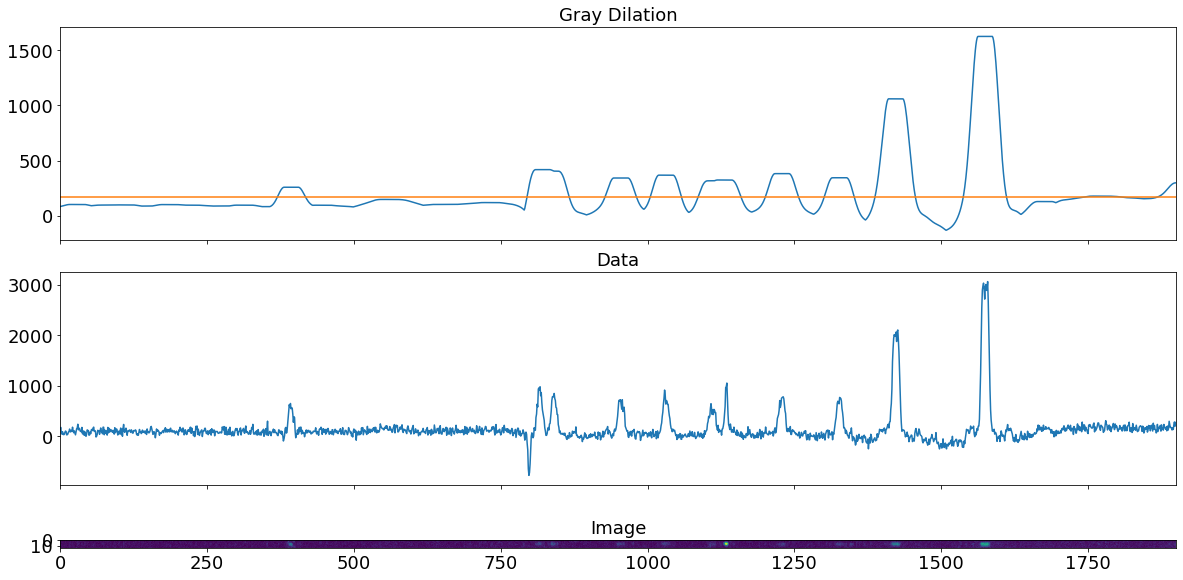

In [67]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(20,10),gridspec_kw={'height_ratios': [4,4,1]})
ax[0].plot(dilation)
xlim = ax[0].get_xlim()
ax[0].plot(pos, dilation[pos], 'or')
ax[0].plot(xlim,(threshold, threshold))
ax[0].set_title('Gray Dilation')
ax[1].plot(to_analyze)
ax[1].plot(pos, to_analyze[pos], 'or')
ax[1].set_title('Data')
ax[2].imshow(data[:,:,1250].T)
ax[2].plot(pos,[20]*len(pos), 'or')
ax[2].set_xlim(0, 1900)
ax[2].set_title('Image')

In [87]:
centers = np.zeros(corrected_data.shape)

for i in range(1200, corrected_data.shape[1]):
    to_analyze = corrected_data[:,i]
    if not len(np.nonzero(to_analyze)[0]) > 0: continue
    peaks = signal.find_peaks_cwt(to_analyze, np.linspace(10, 15))
    if len(peaks): 
        peaks = peaks[to_analyze[peaks]>threshold]
    if len(peaks) >= 1:
        centers[peaks, i] = to_analyze[peaks]
        print(f"Frame {i}/{corrected_data.shape[1]}, detections: {len(peaks)}", end='\r')

KeyboardInterrupt: 

In [115]:
centers = np.zeros(corrected_data.shape)

for i in range(corrected_data.shape[1]):
    to_analyze = corrected_data[:,i]
    filtered = ndimage.filters.uniform_filter1d(to_analyze, 50)
    correlated = ndimage.filters.correlate1d(to_analyze, gaussian_kernel(10))
    dilation = ndimage.grey_dilation(correlated-filtered, size=15)
    maxima = (correlated-filtered == dilation) & (correlated-filtered > np.mean(dilation))
    pos = np.vstack(np.where(maxima)).T
    if len(pos) >= 1:
        centers[pos, i] = to_analyze[pos]
    print(f"Frame {i}, detections: {len(pos)}", end='\r')

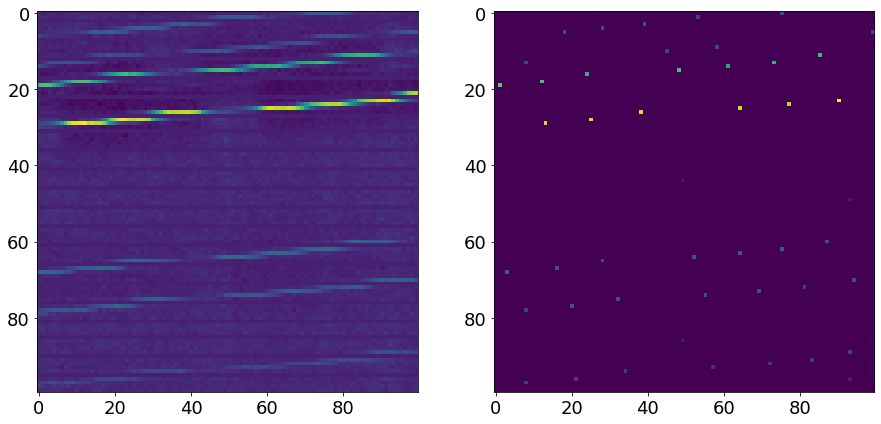

In [105]:
fig, ax = plt.subplots(1,2,figsize=(15, 15),sharex=True)
ax[0].imshow(corrected_data[550:650,1300:1400].T)
ax[1].imshow(centers[550:650,1300:1400].T)

In [116]:
non_zeros = np.zeros(centers.shape, dtype=np.int)
x = np.nonzero(centers)
non_zeros[x] = np.ones(centers.shape, dtype=np.int)[x]

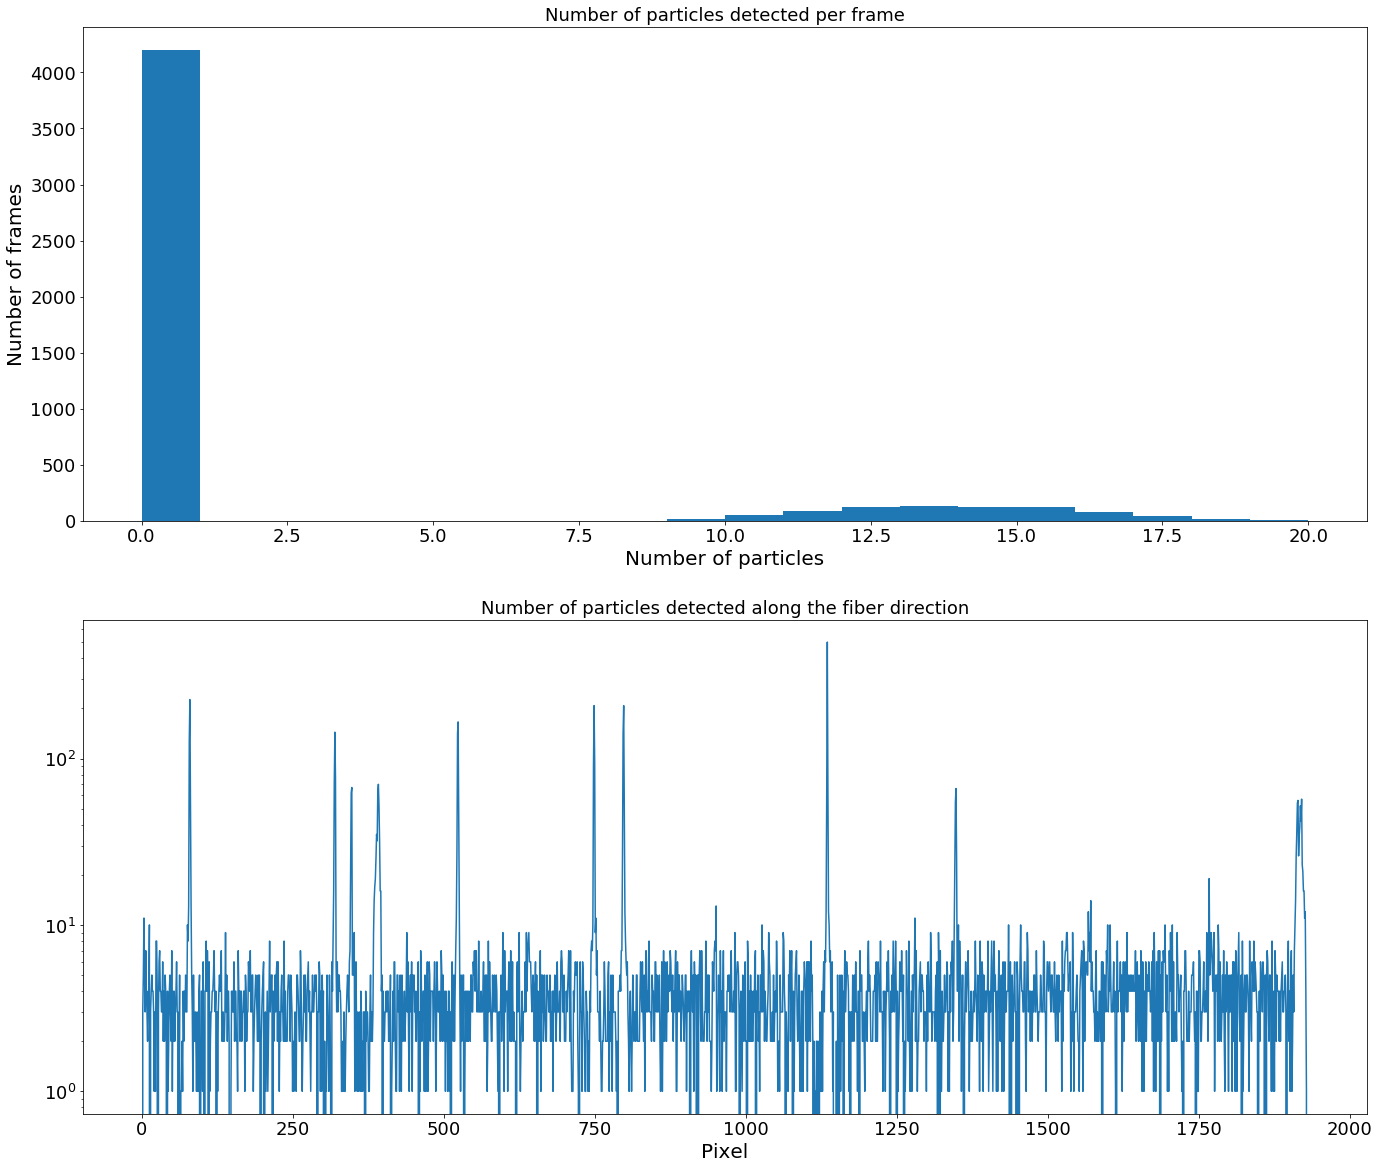

In [125]:
fig, ax = plt.subplots(2, 1)
ax[0].hist(np.sum(non_zeros,0), 20)
ax[1].plot(np.sum(non_zeros,1)[:])
ax[0].set_title('Number of particles detected per frame')
ax[1].set_title('Number of particles detected along the fiber direction')
ax[0].set_xlabel('Number of particles', fontsize=20)
ax[0].set_ylabel('Number of frames', fontsize=20)
ax[1].set_xlabel('Pixel', fontsize=20)
ax[1].set_yscale('log')

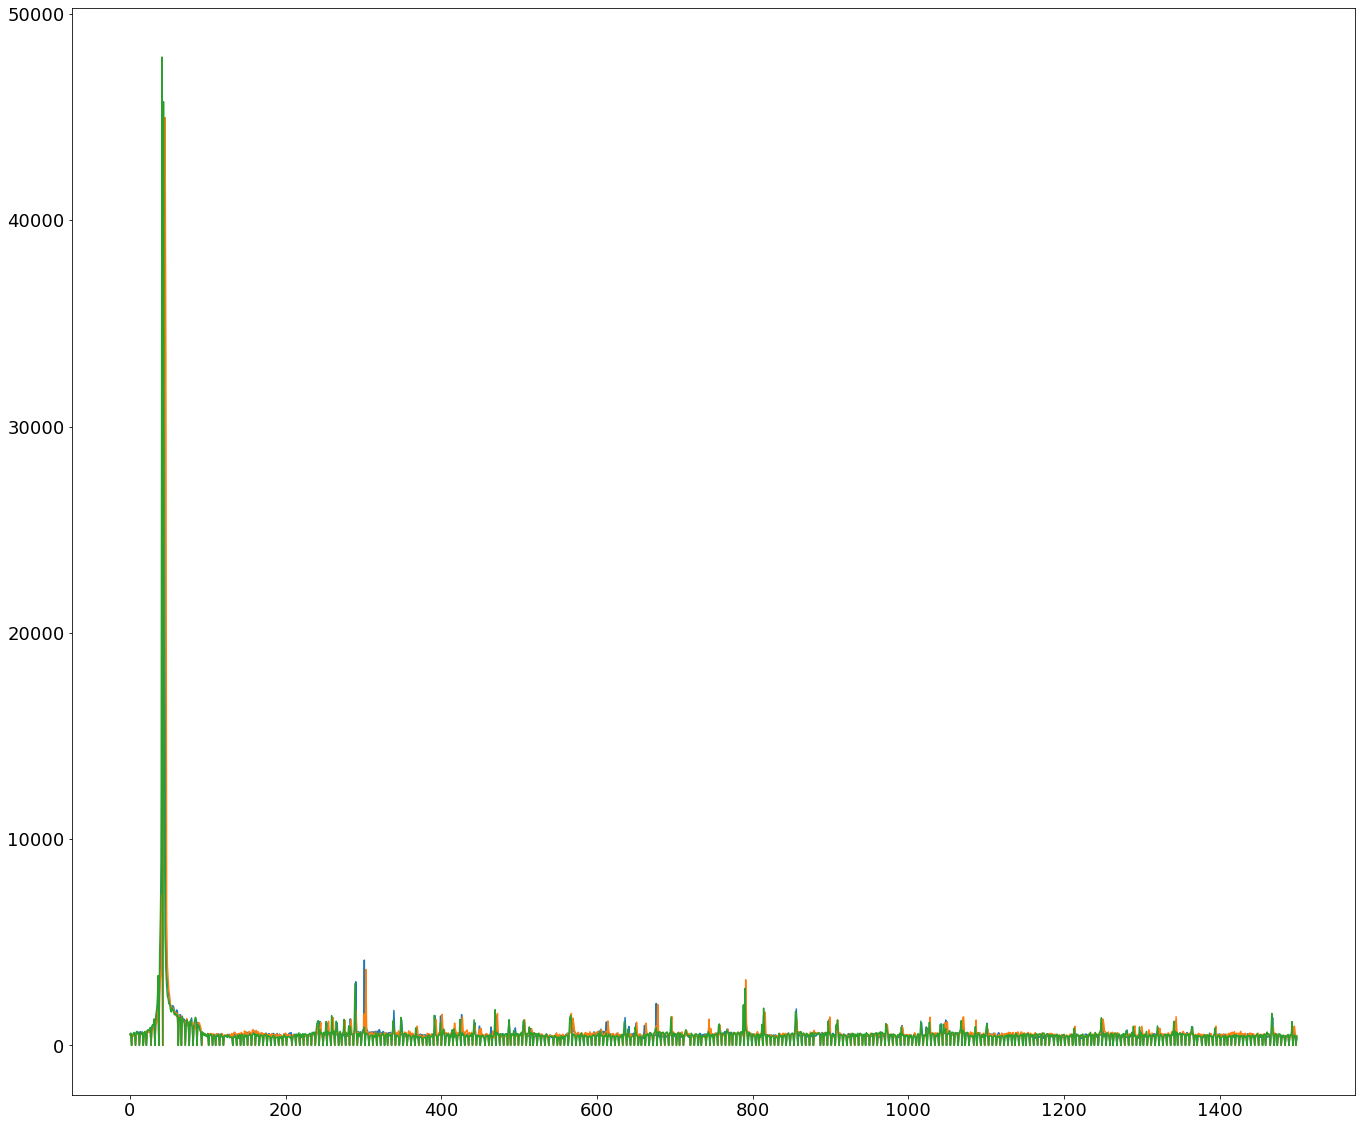

In [118]:
plt.plot(dwaterfall[910,1000:2500])
plt.plot(dwaterfall[900,1000:2500])
plt.plot(dwaterfall[920,1000:2500])

In [119]:
background = np.zeros(dwaterfall.shape)
for i in range(50, dwaterfall.shape[1]):
    background[:,i] = np.mean(dwaterfall[...,i-50:i],1)

In [ ]:
plt.imshow(background.T)

In [1]:
to_plot = dwaterfall-background

NameError: name 'dwaterfall' is not defined

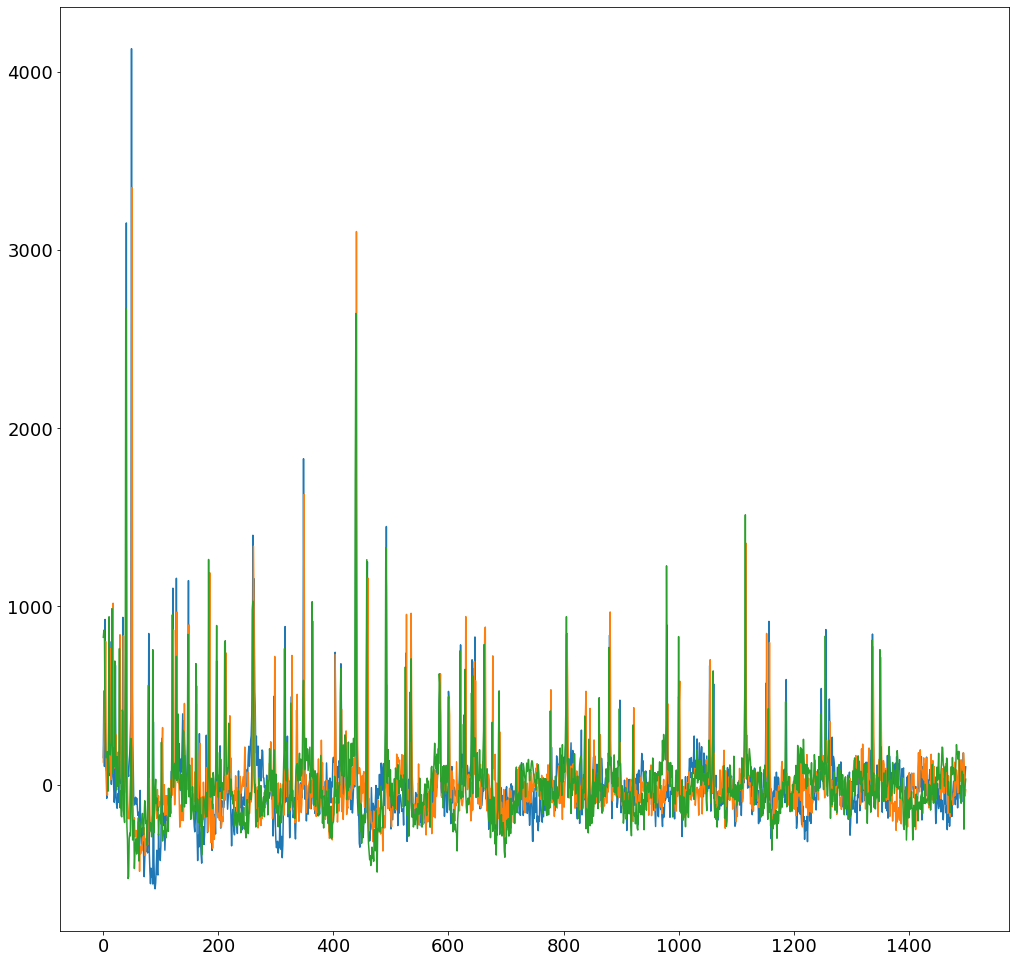

In [41]:
plt.plot(to_plot[910,1000:2500])
plt.plot(to_plot[900,1000:2500])
plt.plot(to_plot[920,1000:2500])

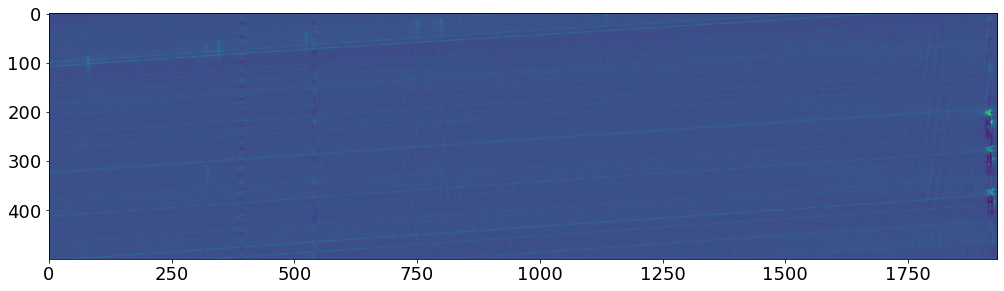

In [42]:
plt.imshow(to_plot[...,1000:1500].T)

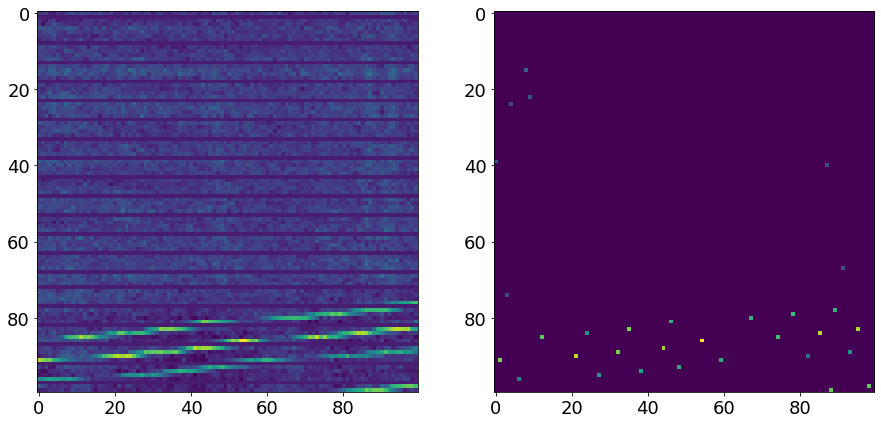

In [126]:
fig, ax = plt.subplots(1,2,figsize=(15, 15),sharex=True)
ax[0].imshow(corrected_data[550:650,1200:1300].T)
ax[1].imshow(centers[550:650,1200:1300].T)

In [127]:
from sklearn.neighbors import NearestNeighbors

In [128]:
to_link = np.copy(centers[610:640,1265:1290].T)
partial_waterfall = np.copy(corrected_data[610:640,1265:1290].T)

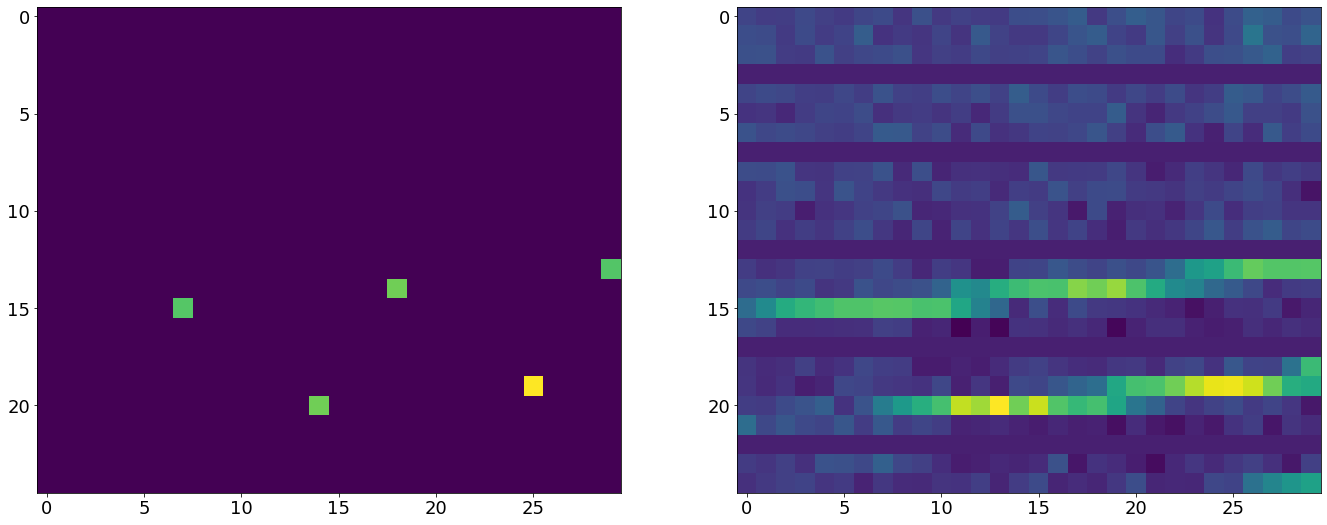

In [129]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(to_link)
ax[1].imshow(partial_waterfall)

In [130]:
to_link[9,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
def find_centers(frame, radius=10):
    """ Frame is a 1-D numpy array """
    filtered = ndimage.filters.uniform_filter1d(frame, 50)
    correlated = ndimage.filters.correlate1d(frame, gaussian_kernel(10))
    dilation = ndimage.grey_dilation(correlated-filtered, size=15)
    threshold = np.percentile(dilation, 64)
    maxima = (correlated-filtered == dilation) & (correlated-filtered > threshold)
    pos = np.squeeze(np.array(np.where(maxima)))
    near_edge = np.any((pos < radius) | (pos > (len(frame) - radius - 1)), 0)
    pos = np.squeeze(pos[~near_edge])
    intensities = np.empty(len(pos))
    if len(pos) >= 1:
        intensities = np.zeros(len(pos))
        for i, p in enumerate(pos):
            intensities[i] = np.sum(frame[int(p)-radius:int(p)+radius])
    return pos, intensities

In [215]:
for i in range(corrected_data.shape[1]):
    if np.sum(corrected_data[-10:,i]) > 50000:
        break

In [216]:
i

744

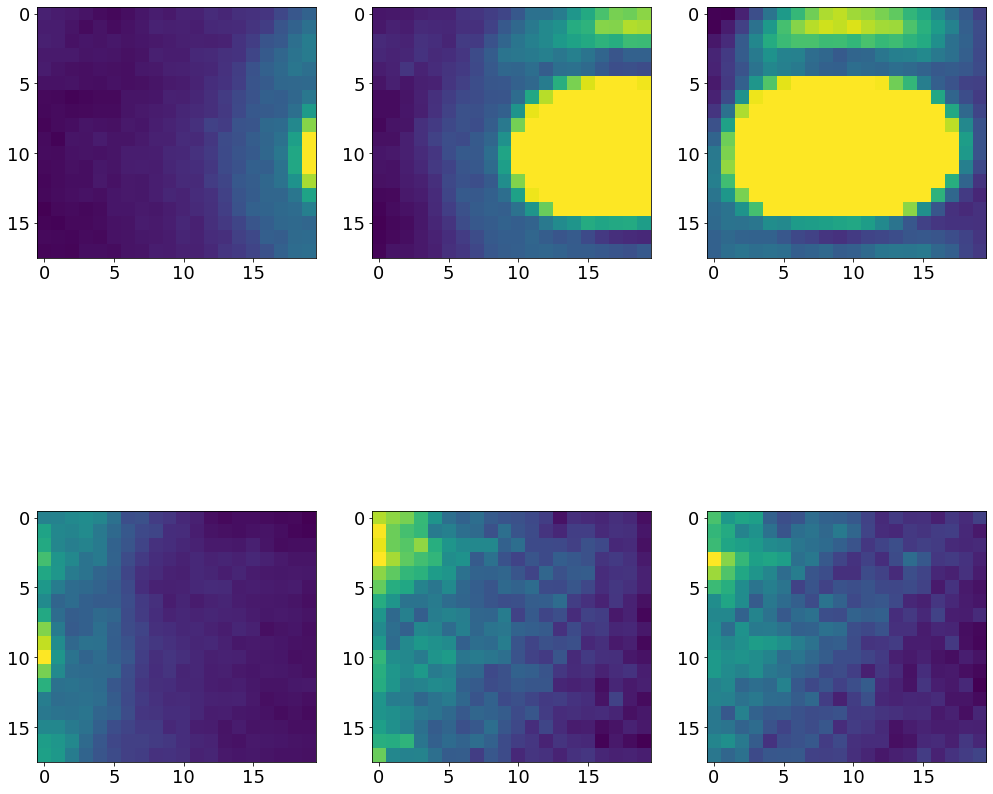

In [217]:
fig, ax = plt.subplots(2,3)
ax[0][0].imshow(data[-20:,20:,i].T)
ax[0][1].imshow(data[-20:,20:,i+1].T)
ax[0][2].imshow(data[-20:,20:,i+2].T)
ax[1][0].imshow(data[-20:,20:,i+3].T)
ax[1][1].imshow(data[-20:,20:,i+4].T)
ax[1][2].imshow(data[-20:,20:,i+5].T)

In [245]:
pos = []
intensity = []
for i in range(corrected_data.shape[0]):
    p, inte = find_centers(corrected_data[:-100,i])
    p = p[inte>10000]
    inte = inte[inte>10000]
    pos.append(p)
    intensity.append(inte)
    if len(p) >= 1:
        break
print(i)
print(pos[i], intensity[i])

755
[1813] [1025769.]


In [ ]:
frame = corrected_data[:, frame_no]

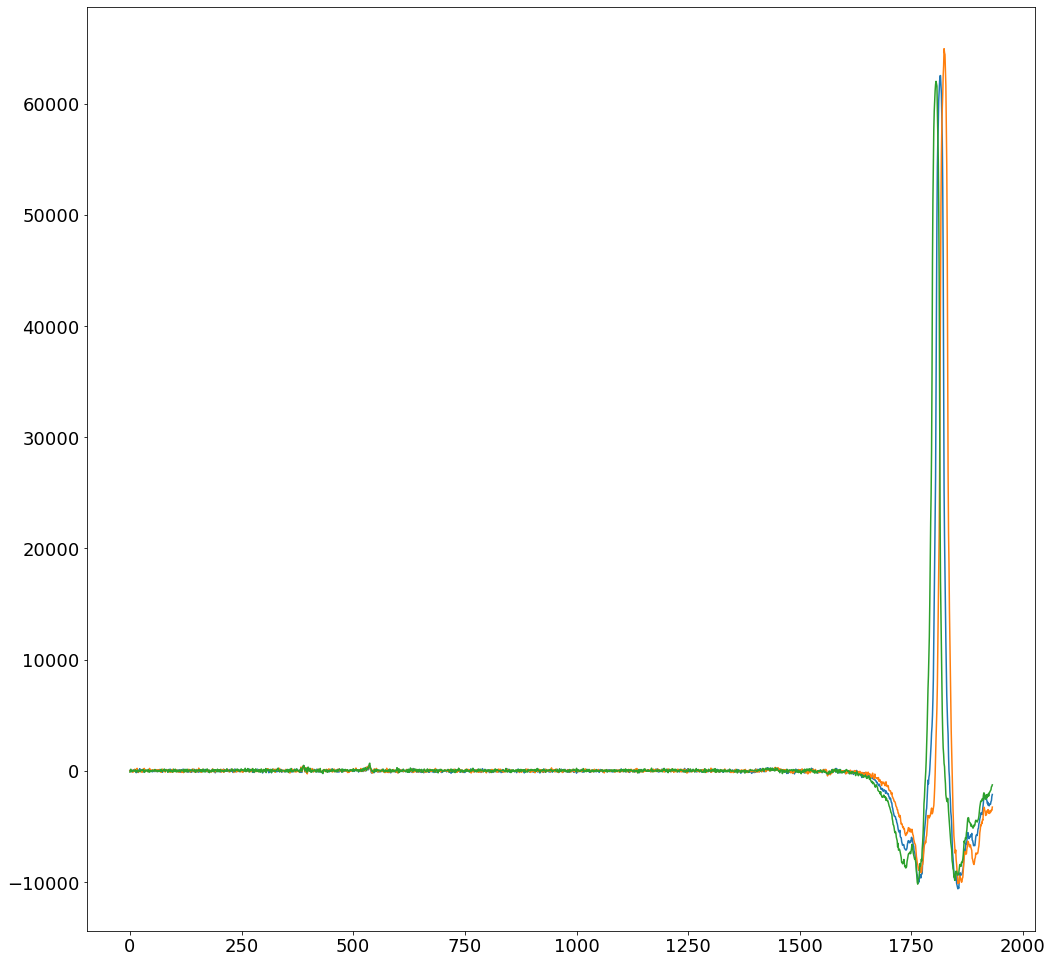

In [246]:
plt.plot(corrected_data[:,i])
plt.plot(corrected_data[:,i-1])
plt.plot(corrected_data[:,i+1])

In [491]:
pos = []
intensity = []
for i in range(corrected_data.shape[1]):
    p, inte = find_centers(corrected_data[:,i], radius=7)
    p = p[inte>0]
    inte = inte[inte>0]
    pos.append(p)
    intensity.append(inte)

In [502]:
p, inte = find_centers(corrected_data[:,time_step], radius=7)

In [503]:
inte

array([], dtype=float64)

[] []


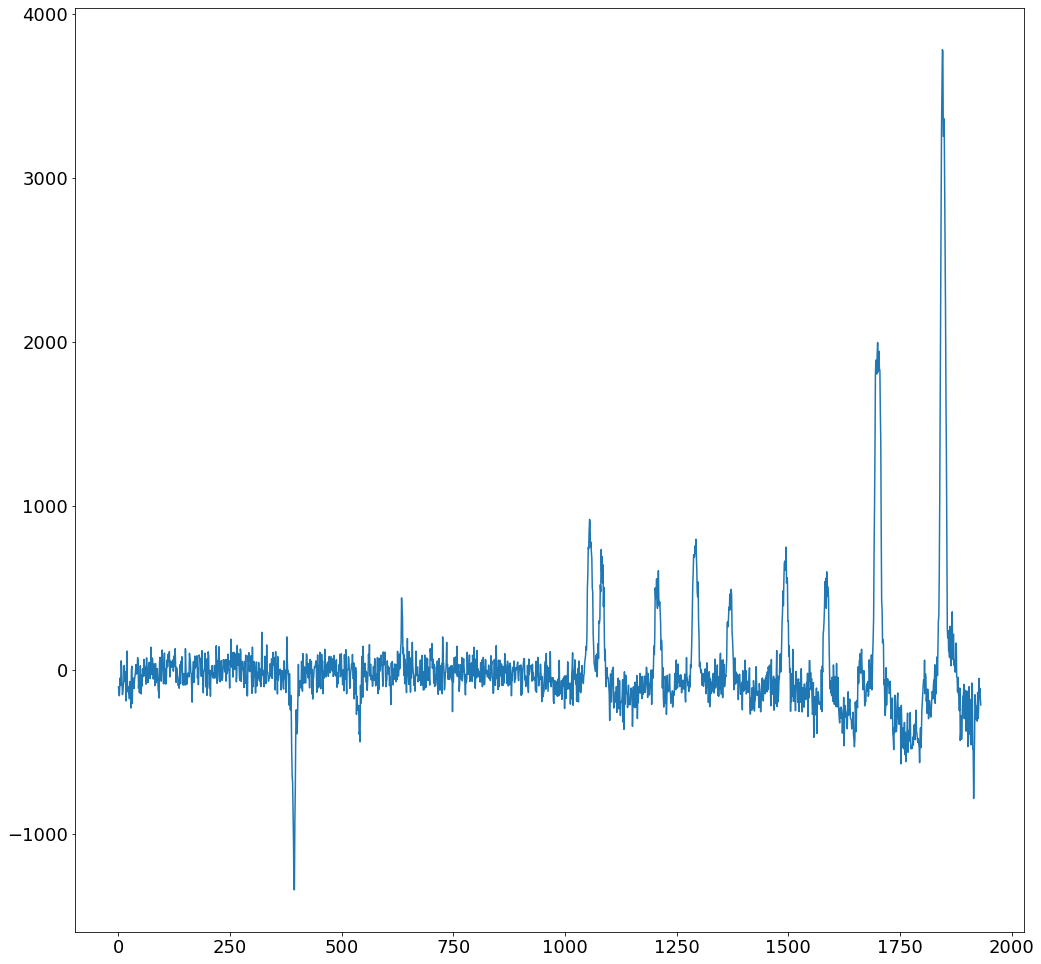

In [497]:
time_step = 991
print(pos[time_step], intensity[time_step])
plt.plot(corrected_data[:,time_step])
# plt.plot(corrected_data[:,time_step+5])
# plt.plot(corrected_data[:,time_step+10])
for p in pos[time_step]:
    if p is not None:
        plt.plot([p],[corrected_data[int(p),time_step]], 'ro')

In [131]:
from sklearn.neighbors import KDTree

In [132]:
particles_1 = np.stack((pos[1285], intensity[1285]), axis=-1)
particles_2 = np.stack((pos[1286]+10, intensity[1286]), axis=-1)
particles_3 = np.stack((pos[1288]+30, intensity[1288]), axis=-1)

IndexError: index 1285 is out of bounds for axis 0 with size 0

In [427]:
X = np.concatenate((particles_1, particles_2, particles_3))

In [428]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='kd_tree').fit(X)

In [429]:
distances, indices = nbrs.kneighbors(X)

In [430]:
indices

array([[ 0,  1],
       [ 1, 11],
       [ 2, 12],
       [ 3, 13],
       [ 4, 24],
       [ 5, 21],
       [ 6, 16],
       [ 7, 18],
       [ 8, 27],
       [ 9, 19],
       [10, 21],
       [11,  1],
       [12,  2],
       [13,  3],
       [14, 27],
       [15, 25],
       [16,  6],
       [17, 27],
       [18,  7],
       [19,  9],
       [20, 21],
       [21, 10],
       [22,  2],
       [23, 13],
       [24,  4],
       [25, 15],
       [26,  6],
       [27,  8],
       [28, 18],
       [29, 19],
       [30, 28]], dtype=int64)

In [431]:
tree = KDTree(X, leaf_size=2)

In [434]:
dist, ind = tree.query(X[:], k=3)

In [435]:
print(ind)

[[ 0  1 11]
 [ 1 11  0]
 [ 2 12 22]
 [ 3 13 23]
 [ 4 24 15]
 [ 5 21 10]
 [ 6 16 26]
 [ 7 18 17]
 [ 8 27 17]
 [ 9 19 29]
 [10 21  5]
 [11  1  0]
 [12  2 22]
 [13  3 23]
 [14 27  8]
 [15 25  4]
 [16  6 26]
 [17 27  7]
 [18  7 28]
 [19  9 29]
 [20 21  5]
 [21 10  5]
 [22  2 12]
 [23 13  3]
 [24  4  7]
 [25 15 28]
 [26  6 29]
 [27  8 17]
 [28 18 30]
 [29 19  9]
 [30 28 18]]


In [436]:
print(X[2],X[12],X[22])

[  223. 29308.] [  222. 28585.] [  207. 30058.]


In [415]:
X[2]

array([  223., 29308.])

In [416]:
X[12]

array([  212., 28585.])

In [383]:
particles_1

array([[  103.,  5539.],
       [  103.,  4869.],
       [  103., 29308.],
       [  103., 45408.],
       [  103.,  9618.],
       [  103.,  7670.],
       [  103.,  5320.],
       [  103.,  9928.],
       [  103., 11091.],
       [  103.,  4055.],
       [  173.,  5539.],
       [  173.,  4869.],
       [  173., 29308.],
       [  173., 45408.],
       [  173.,  9618.],
       [  173.,  7670.],
       [  173.,  5320.],
       [  173.,  9928.],
       [  173., 11091.],
       [  173.,  4055.],
       [  223.,  5539.],
       [  223.,  4869.],
       [  223., 29308.],
       [  223., 45408.],
       [  223.,  9618.],
       [  223.,  7670.],
       [  223.,  5320.],
       [  223.,  9928.],
       [  223., 11091.],
       [  223.,  4055.],
       [  342.,  5539.],
       [  342.,  4869.],
       [  342., 29308.],
       [  342., 45408.],
       [  342.,  9618.],
       [  342.,  7670.],
       [  342.,  5320.],
       [  342.,  9928.],
       [  342., 11091.],
       [  342.,  4055.],


In [386]:
particles_1 = np.stack((pos[1085], intensity[1085]), axis=-1)

In [387]:
particles_1

array([[  103.,  5539.],
       [  173.,  4869.],
       [  223., 29308.],
       [  342., 45408.],
       [  814.,  9618.],
       [  935.,  7670.],
       [ 1167.,  5320.],
       [ 1461.,  9928.],
       [ 1569., 11091.],
       [ 1734.,  4055.]])

In [38]:
f = h5py.File(os.path.join(data_folder, 'test.h5'), 'w')
g = f.create_group('data')

In [40]:
meta = {1:1,2:'2','longer':'longer'}
jmeta = json.dumps(meta)

In [53]:
mdset = g.create_dataset('metadatas', data=jmeta.encode("utf-8","ignore"))

In [60]:
mdset[()]

b'{"1": 1, "2": "2", "longer": "longer", "3": 4}'

In [57]:
meta.update({3:4})
jmeta = json.dumps(meta)

In [59]:
mdset[()] = jmeta.encode("utf-8","ignore")

In [51]:
mdset

b'{"1": 1, "2": "2", "longer": "longer", "3": 3}'